In [5]:
#Завдання 1: Багатошарова нейронна мережа для датасету Fashion MNIST
#Завантаження датасету:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()


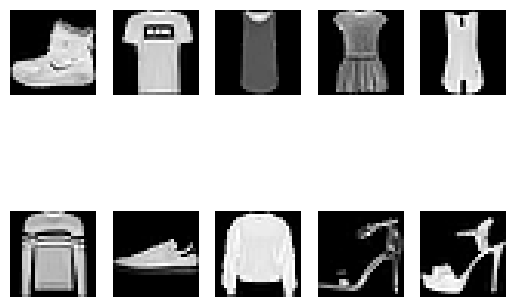

In [7]:
import matplotlib.pyplot as plt

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.axis('off')
plt.show()


In [9]:
#Підготовка даних та побудова архітектури моделі:
#Нормалізуємо зображення та визначимо архітектуру нейронної мережі.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Flatten, Dense

# Побудова моделі
model = Sequential([
    Input(shape=(28, 28)),      # Додаємо шар Input
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])


In [10]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss', patience=5)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)


In [11]:
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

# Створення моделі
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Компіляція моделі
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Далі виконується навчання або оцінка моделі
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)




Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7767 - loss: 0.6302 - val_accuracy: 0.8490 - val_loss: 0.4152
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8641 - loss: 0.3729 - val_accuracy: 0.8450 - val_loss: 0.4038
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8759 - loss: 0.3361 - val_accuracy: 0.8648 - val_loss: 0.3747
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8852 - loss: 0.3069 - val_accuracy: 0.8706 - val_loss: 0.3703
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8922 - loss: 0.2904 - val_accuracy: 0.8699 - val_loss: 0.3493
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8981 - loss: 0.2754 - val_accuracy: 0.8750 - val_loss: 0.3447
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9020 - loss: 0.2598 - val_accuracy: 0.8770 - val_loss: 0.3674
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9057 - loss: 0.2527 - 

In [18]:
from sklearn.metrics import classification_report
import numpy as np

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred_classes))


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 578us/step
              precision    recall  f1-score   support

           0       0.80      0.90      0.84      1000
           1       0.98      0.98      0.98      1000
           2       0.79      0.81      0.80      1000
           3       0.93      0.87      0.90      1000
           4       0.80      0.81      0.80      1000
           5       0.98      0.96      0.97      1000
           6       0.73      0.64      0.68      1000
           7       0.94      0.95      0.95      1000
           8       0.96      0.98      0.97      1000
           9       0.95      0.96      0.95      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.88     10000
weighted avg       0.89      0.89      0.88     10000



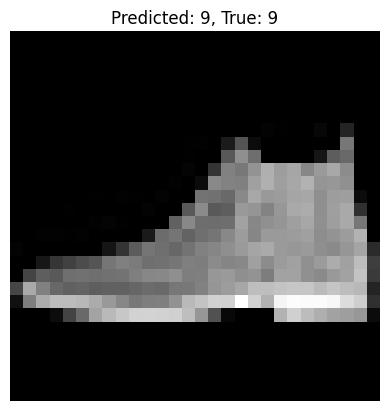

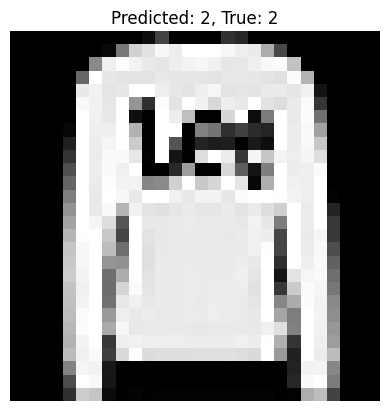

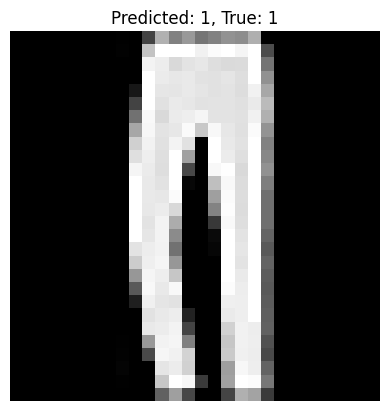

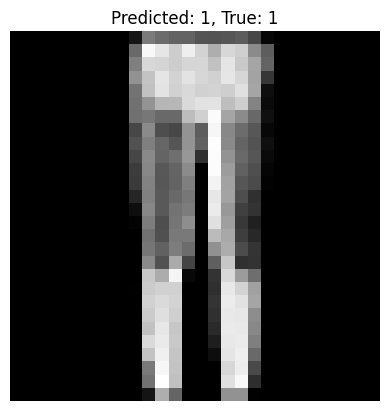

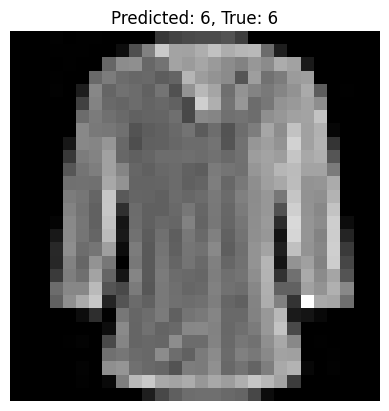

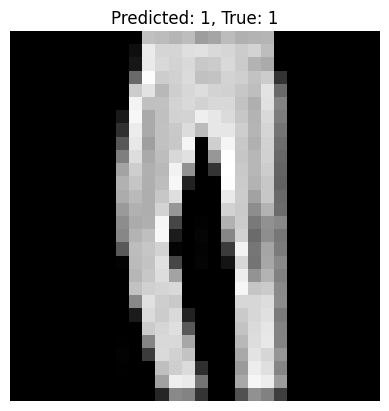

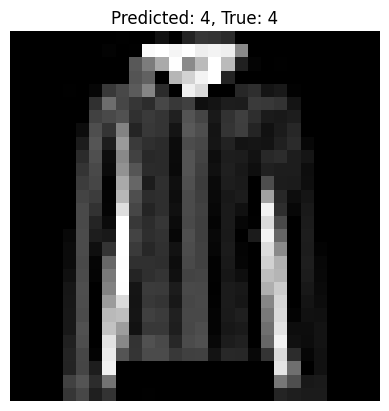

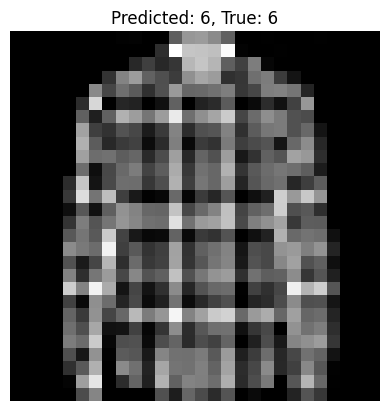

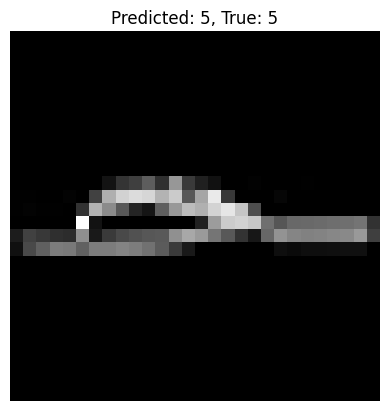

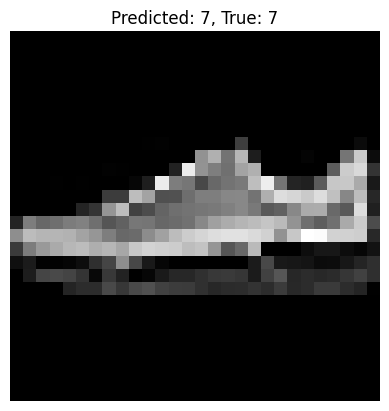

In [19]:
for i in range(10):
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f"Predicted: {y_pred_classes[i]}, True: {y_test[i]}")
    plt.axis('off')
    plt.show()


In [20]:
#Завдання 2: Налаштування моделі з Keras Tuner
!pip install -q -U keras-tuner


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Flatten, Dense

model = Sequential([
    Input(shape=(28, 28)),  # Вхідний шар
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])


In [26]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)



In [27]:
tuner.search(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 779us/step - accuracy: 0.6814 - loss: 0.8789 - val_accuracy: 0.8261 - val_loss: 0.4805
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 717us/step - accuracy: 0.8230 - loss: 0.4900 - val_accuracy: 0.8431 - val_loss: 0.4328
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 713us/step - accuracy: 0.8379 - loss: 0.4433 - val_accuracy: 0.8460 - val_loss: 0.4212
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 723us/step - accuracy: 0.8433 - loss: 0.4238 - val_accuracy: 0.8488 - val_loss: 0.4172
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 781us/step - accuracy: 0.8492 - loss: 0.4101 - val_accuracy: 0.8476 - val_loss: 0.4200
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 719us/step - accuracy: 0.8537 - loss: 0.3989 - val_accuracy: 0.8631 - val_loss: 0.3914
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 680us/step - accuracy: 0.8562 - loss: 0.3949 - val_accuracy: 0.8613 - val_loss: 0.3821
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 681us/step - accuracy: 0.8611 -

KeyboardInterrupt: 

In [28]:
best_model = tuner.get_best_models(num_models=1)[0]
best_model.evaluate(X_test, y_test)


  4/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8275 - loss: 0.4647964

C:\Users\fallj\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 722us/step - accuracy: 0.8854 - loss: 0.3402


[0.334476500749588, 0.88919997215271]